# Stock Price Prediction

<font size=5> Hazem Metwalli 211001615


# Glossary
<font size=5><hr>
1.[Library Imports](#li)
<br>
2.[Dataset Validation](#dv)
<br>
3.[Dataset Visualization](#dvv)
<br>
4.[Preprocessing](#pp)
<br>
5.[Evaluation](#ev)

## Library Imports <a id='li'></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Dataset Validation <a id='dv'></a>

### Data Gathering

This a dataset of the daily price of the Tesla stock(TSLA), in American Dollars (USD$), over the period of 5 years, since 02/01/2018 until 30/12/2022. The dataset was gathered from Yahoo Finance. The date will be the dataset's index. The dataset's features are as following:

- Open: The price from the first transaction of a business day.
<br>
- High: The highest price at which a stock is traded during the business day.
<br>
- Low: The lowest price at which a stock is traded during the business day.
<br>
- Close: The last price anyone paid for a share of stock during a business day.
<br>
- Adj Close: The closing price after adjustments for all applicable splits and dividend distributions.
<br>
- Volume: The number of shares traded in a stock or contracts traded in futures or options (indicates market strength).
<br>
<br>

In [4]:
TSLA = pd.read_csv("./TSLA.csv")
TSLA.set_index("Date", drop=True, inplace=True)

In [5]:
TSLA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


In [6]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,131.914480,134.953362,128.540340,131.784972,131.784972,1.324330e+08
std,118.024908,120.693717,114.974179,117.835854,117.835854,9.017629e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,21.060001,21.476001,20.643000,21.078333,21.078333,7.578000e+07
50%,81.431999,81.866669,79.040001,80.577332,80.577332,1.016115e+08
75%,235.556671,239.885003,231.284996,236.125000,236.125000,1.543911e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


## Data Visulization <a id='dvv'></a>

### Univariate

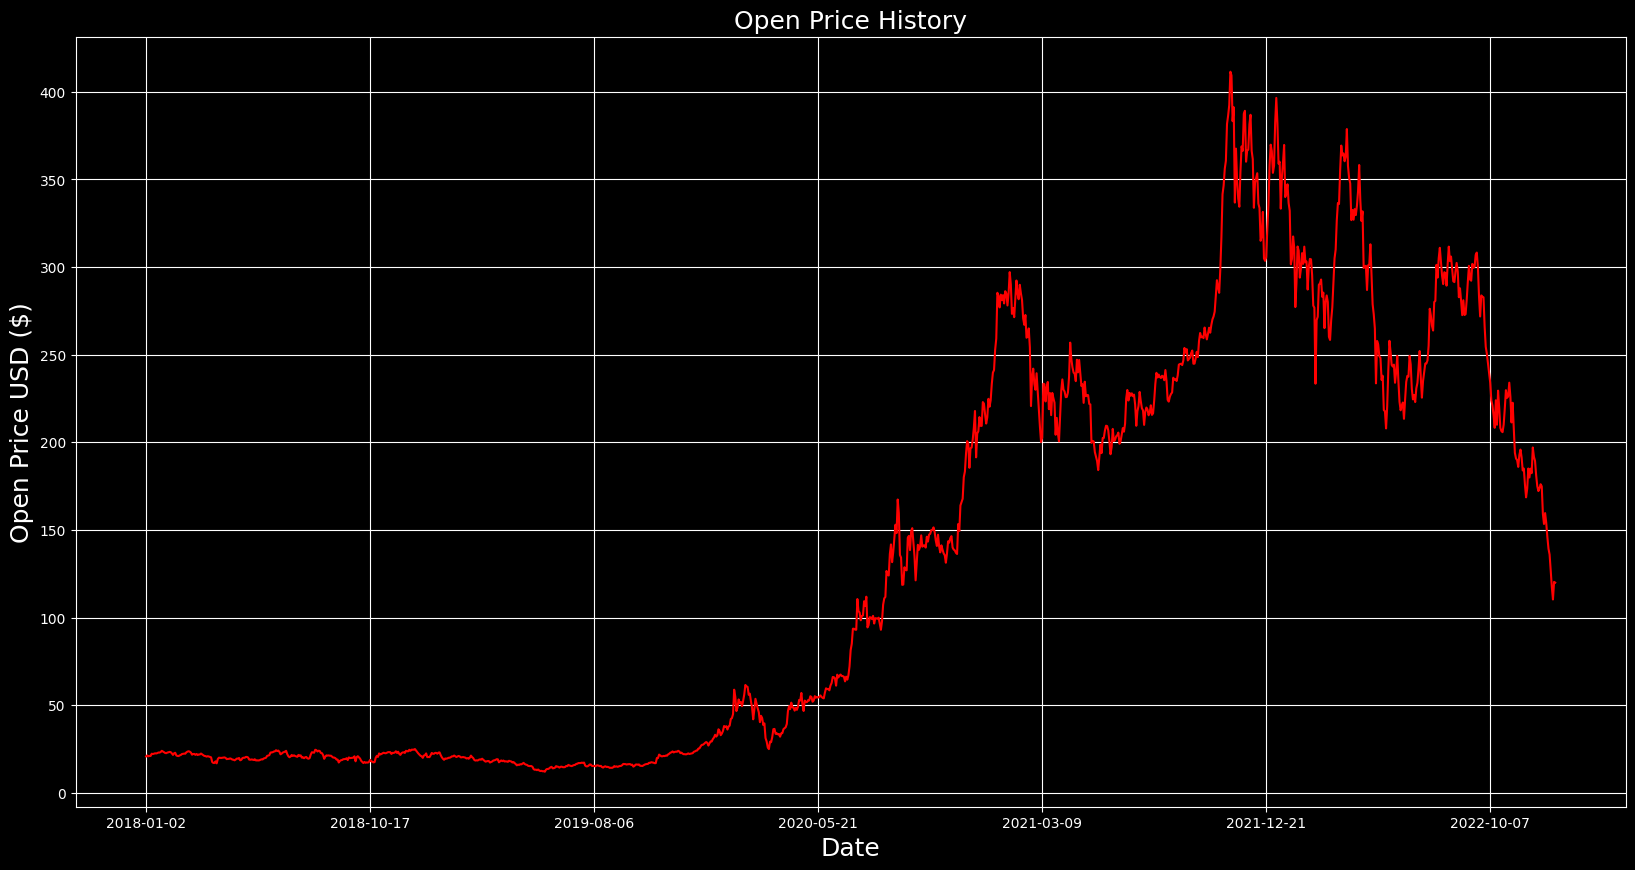

In [7]:
plt.title("Open Price History", fontsize=18)
TSLA["Open"].plot(figsize=(20, 10), color="#ff0000")
plt.ylabel("Open Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.show()

It appears that at the start of 2020 Tesla has started gaining some fame and so did their stock. The stock started increasing rapidly up until early 2022.

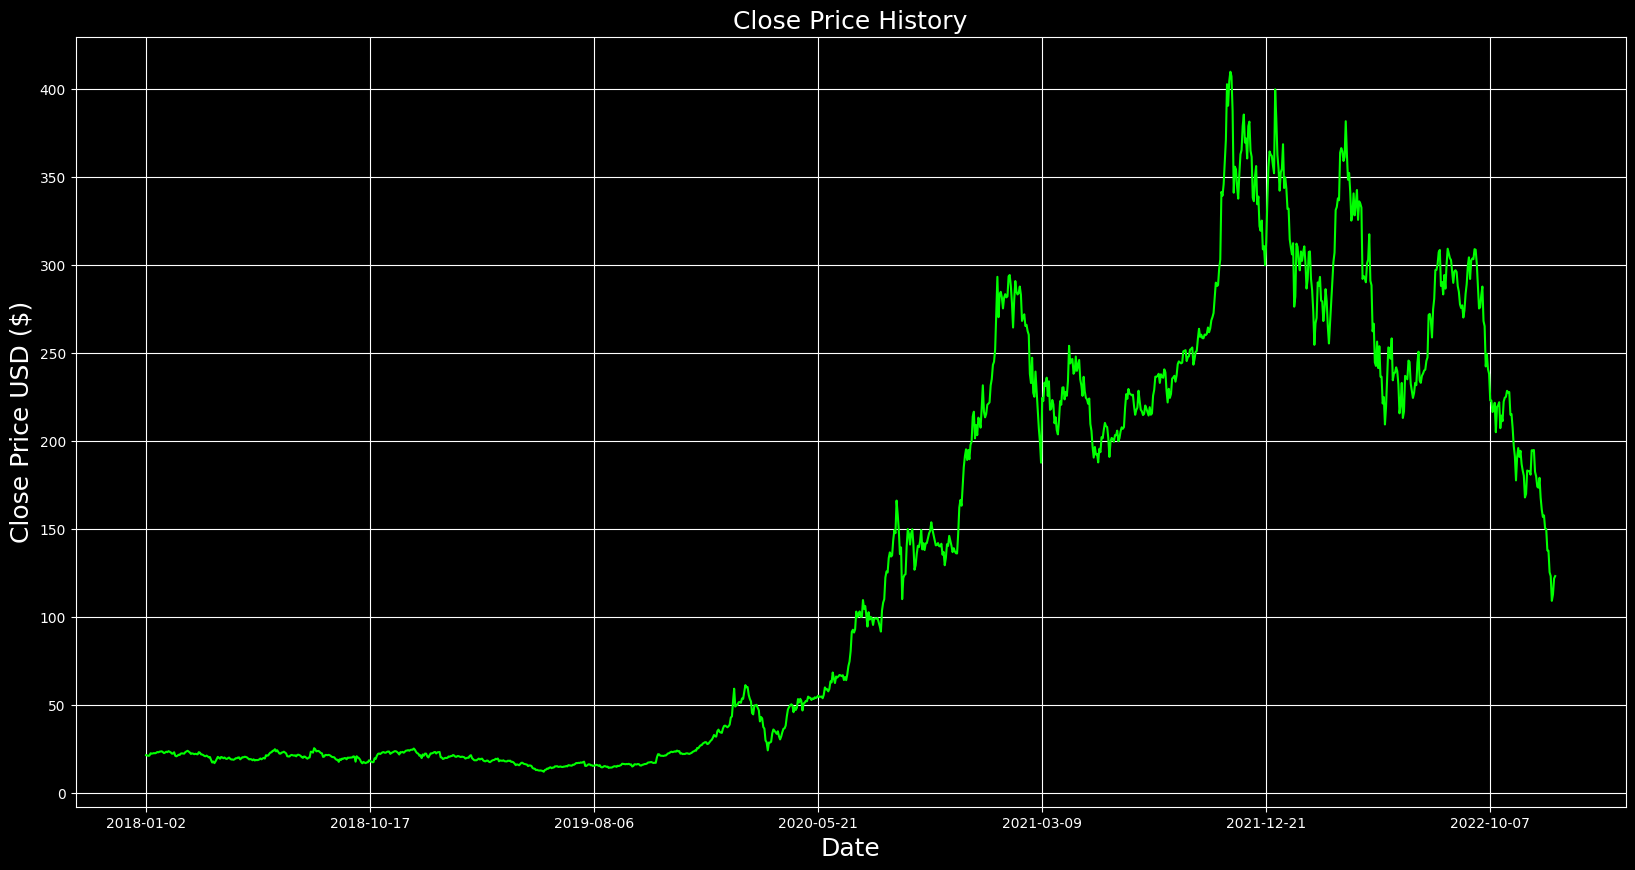

In [8]:
plt.title("Close Price History", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.show()

The Close prices are almost similar to the Open prices. However, during the day, prices may jump suddenly to high prices.

### Bivariate

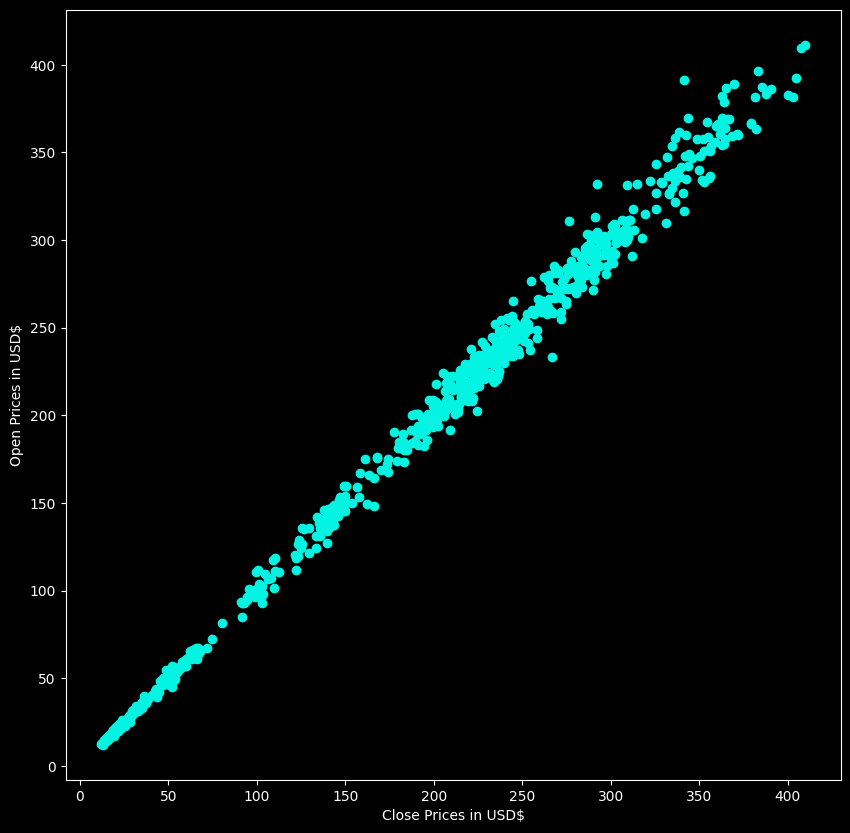

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(TSLA["Close"], TSLA["Open"], color="#03f4e3")
plt.xlabel("Close Prices in USD$")
plt.ylabel("Open Prices in USD$")
plt.show()

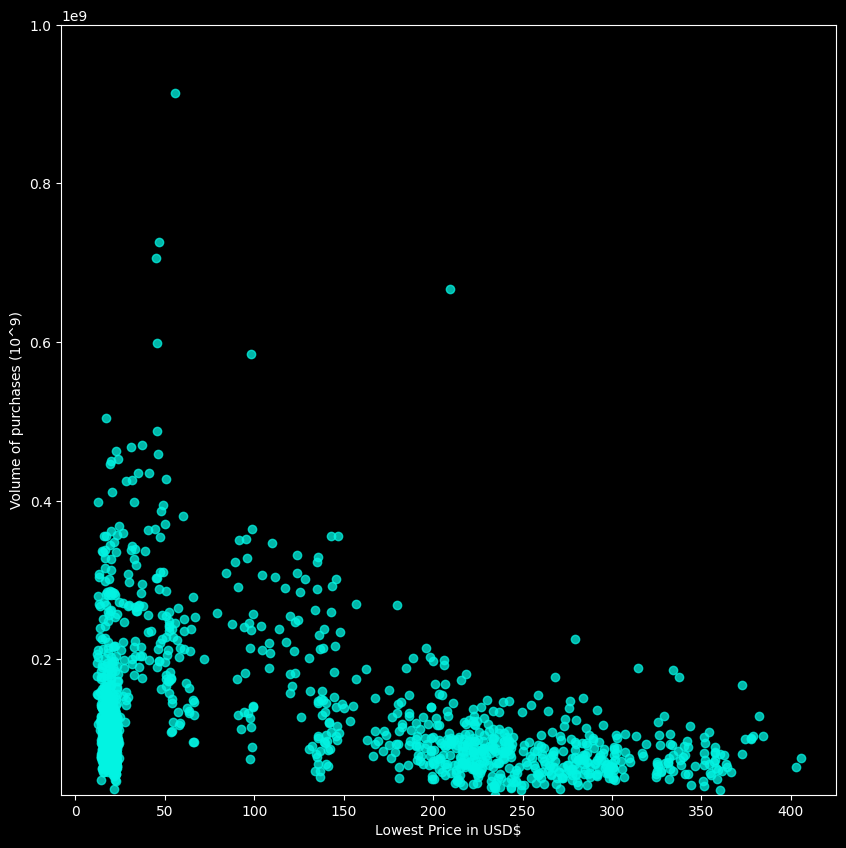

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(TSLA["Low"], TSLA["Volume"], color="#03f4e3", alpha=0.75)
plt.xlabel("Lowest Price in USD$")
plt.ylabel("Volume of purchases (10^9)")
plt.ylim([2.940180e07, 1e09])
plt.show()

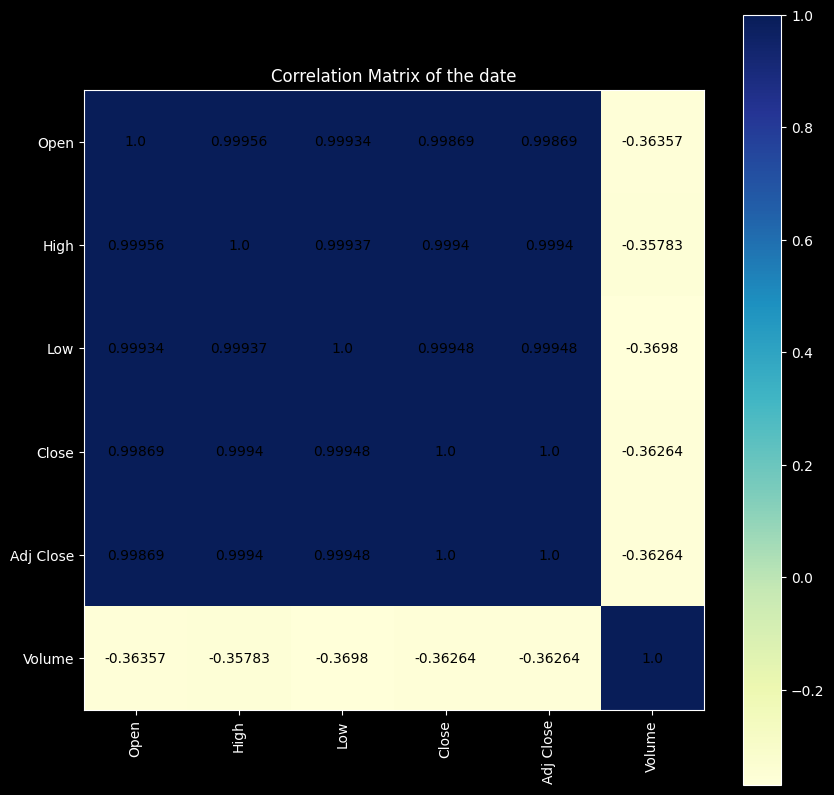

In [11]:
corr = TSLA.corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap="YlGnBu", interpolation="nearest")
plt.colorbar()
for i in range(6):
    for j in range(6):
        plt.annotate(
            str(round(corr.values[i][j], 5)),
            xy=(j, i),
            ha="center",
            va="center",
            color="black",
        )
plt.title("Correlation Matrix of the date")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


Most of the features are colored Navy (High correlation) in the heatmap because the values are close to each other except the volume values. The volume has no correlation with the other features, therefore, we can't deduce any information from the heatmap. This makes us think about dropping the volume column.

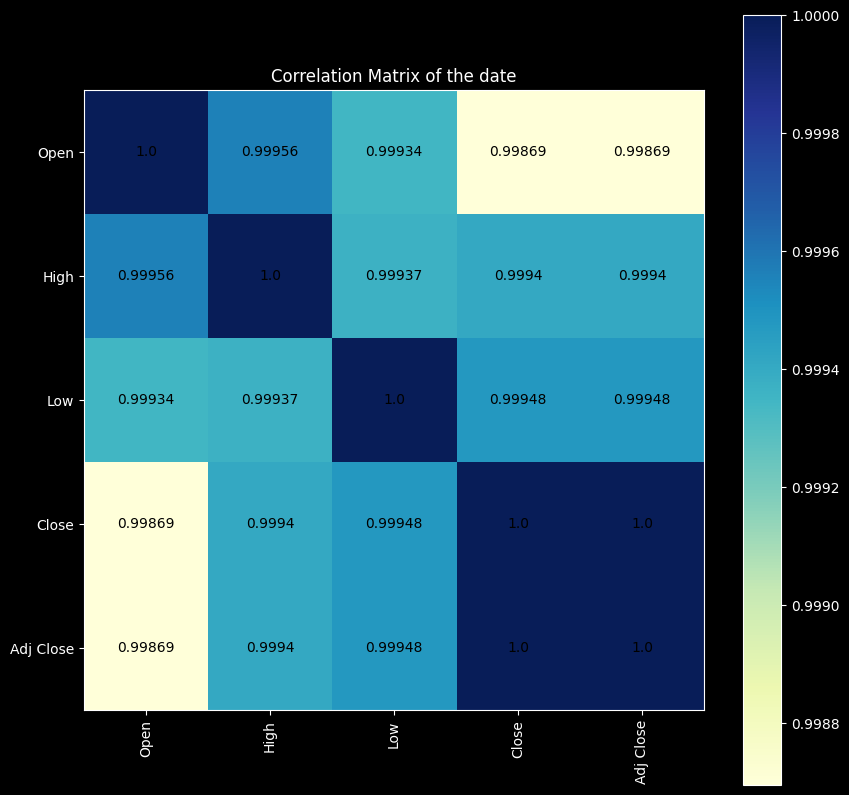

In [12]:
corr = TSLA[["Open", "High", "Low", "Close", "Adj Close"]].corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap="YlGnBu", interpolation="nearest")
plt.colorbar()
for i in range(5):
    for j in range(5):
        plt.annotate(
            str(round(corr.values[i][j], 5)),
            xy=(j, i),
            ha="center",
            va="center",
            color="black",
        )
plt.title("Correlation Matrix of the date")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


This heatmap makes more sense and more understandable without the volume feature.

## Preprocessing<a id='pp'></a>

In [13]:
x = TSLA[["Open", "Low", "High"]]
y = TSLA["Close"]
xTrain, xTest, yTrain, yTest = train_test_split(
    x.values,
    y.values, 
    test_size=0.25
)

### K-Fold Utilization

#### Random Forest using Grid Search CV

Grid Search CV passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output. The best hyperparameters that were found by the Grid Search CV are then fed to the Random Forest Regressor model and then the model is fit.

In [14]:
rf = RandomForestRegressor()
rfg = {
    "n_estimators": [20, 50, 100, 200, 500, 1000], 
    "max_depth": np.arange(1, 15, 1)
    }

rf_gscv = GridSearchCV(
    estimator=rf, 
    param_grid=rfg, 
    scoring="neg_mean_squared_error", 
    cv=5, 
    n_jobs=-1
)

rf_gscv_fit = rf_gscv.fit(xTrain, yTrain)

rf_best_parameters = rf_gscv_fit.best_params_
print(rf_best_parameters)

{'max_depth': 8, 'n_estimators': 200}


In [15]:
rf_best_fit = rf_gscv_fit.best_estimator_
rf_best_fit.fit(xTrain, yTrain)
rf_yPrediction = rf_best_fit.predict(xTest)

#### AdaBoost Regressor using Random Forest Regressor Model

The best hyperparameters that were found by the Grid search CV in the previous model are fed to the AdaBoost model.

In [16]:
rf_adb = AdaBoostRegressor( estimator=RandomForestRegressor(
                            max_depth=rf_best_parameters['max_depth'],
                            n_estimators=rf_best_parameters['n_estimators'])
                            )
                           
rf_adb

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=8,
                                                  n_estimators=200))

In [17]:
rf_adb_fit = rf_adb.fit(xTrain,yTrain)
rf_adb_yPrediction = rf_adb_fit.predict(xTest)


#### Support Vector Regressor (SVR) using Grid Search CV

In [18]:
svr = SVR()

svrg = {
    'kernel': ['rbf'],
    'C' : [1e2, 1e3, 1e4, 1e5],
    'gamma' : [1e-3, 1e-4]
}

svr_gscv = GridSearchCV(
    estimator = svr,
    param_grid = svrg,
    scoring = 'neg_mean_squared_error',
    cv = 5,
    n_jobs = -1
    )

svr_gscv_fit = svr_gscv.fit(xTrain, yTrain)

svr_best_parameters = svr_gscv_fit.best_params_
print(svr_best_parameters)

{'C': 1000.0, 'gamma': 0.0001, 'kernel': 'rbf'}


In [19]:
svr_best_fit = svr_gscv_fit.best_estimator_
svr_best_fit.fit(xTrain, yTrain)
svr_yPrediction = svr_best_fit.predict(xTest)

### Regularization

#### Elastic Net

In [20]:
eln = ElasticNet()

elng = {
    'alpha' : [ 1e-3, 1e-2, 1e-1, 1],
    'l1_ratio' : np.arange(0, 1, 0.01),
    'max_iter' : [2000, 4000, 6000, 8000, 10000]
}

elng_gscv = GridSearchCV(
    estimator=eln,
    param_grid=elng,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

elng_gscv_fit = elng_gscv.fit(xTrain, yTrain)

elng_best_parameters = elng_gscv_fit.best_params_
print(elng_best_parameters)

{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 6000}


c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.136e+03, tolerance: 1.308e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [21]:
eln_best_fit = elng_gscv_fit.best_estimator_
eln_best_fit.fit(xTrain, yTrain)
eln_yPrediction = eln_best_fit.predict(xTest)

c:\Users\zoma_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.136e+03, tolerance: 1.308e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


## Evaluation <a id='ev'></a>

#### Random Forest using Grid Search CV Evaluation

These are all the searches that was done sorted by the rank test score column. Starting by the best parameters down until the worst. We can deduct that at depth 1 the ranking is the worst.

In [22]:
rf_df = pd.DataFrame(rf_gscv_fit.cv_results_)
rf_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
45,1.557207,0.076543,0.019202,0.001124,8,200,"{'max_depth': 8, 'n_estimators': 200}",-11.252637,-15.625065,-10.919439,-17.182470,-11.605993,-13.317121,2.577071,1
67,0.462857,0.011014,0.007049,0.000543,12,50,"{'max_depth': 12, 'n_estimators': 50}",-11.837410,-15.775149,-10.780557,-16.819571,-11.620965,-13.366730,2.441205,2
82,4.997451,0.102450,0.057916,0.002994,14,500,"{'max_depth': 14, 'n_estimators': 500}",-11.979834,-15.257813,-10.549295,-17.677687,-11.409866,-13.374899,2.677721,3
74,1.066899,0.219048,0.014078,0.002720,13,100,"{'max_depth': 13, 'n_estimators': 100}",-11.572279,-15.021896,-10.400752,-18.847575,-11.045883,-13.377677,3.168029,4
62,0.895418,0.032733,0.012057,0.000555,11,100,"{'max_depth': 11, 'n_estimators': 100}",-11.409229,-15.321921,-10.891121,-17.998440,-11.296555,-13.383453,2.811412,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,0.473954,0.013528,0.015399,0.001513,1,200,"{'max_depth': 1, 'n_estimators': 200}",-2151.453387,-1894.749976,-1204.481736,-2364.035061,-1964.212785,-1915.786589,391.205256,80
5,2.560850,0.158254,0.075037,0.005207,1,1000,"{'max_depth': 1, 'n_estimators': 1000}",-2156.332063,-1913.680272,-1204.298797,-2351.693339,-1955.055766,-1916.212047,388.751154,81
4,1.341253,0.049322,0.041580,0.003555,1,500,"{'max_depth': 1, 'n_estimators': 500}",-2166.156114,-1915.894356,-1203.450148,-2342.854805,-1962.711551,-1918.213395,388.501707,82
1,0.140190,0.012747,0.005409,0.000867,1,50,"{'max_depth': 1, 'n_estimators': 50}",-2170.344321,-1968.119928,-1195.818343,-2370.617006,-1950.076907,-1930.995301,398.191587,83


In [23]:
rfr_MSE = round(metrics.mean_squared_error(yTest, rf_yPrediction), 3)
rfr_MAPE = round(100 * metrics.mean_absolute_percentage_error(yTest, rf_yPrediction), 3)
print("Random Forest Performance Evaluation")
print("------------------------------------")
print("MSE: ", rfr_MSE)
print("RMSE: ", round(np.sqrt(rfr_MSE),3))
print("MAPE: ", rfr_MAPE, "%")

Random Forest Performance Evaluation
------------------------------------
MSE:  10.721
RMSE:  3.274
MAPE:  1.419 %


In [24]:
TSLA["RF Predicted Close"] = rf_best_fit.predict(TSLA[["Open", "High", "Low"]].values)

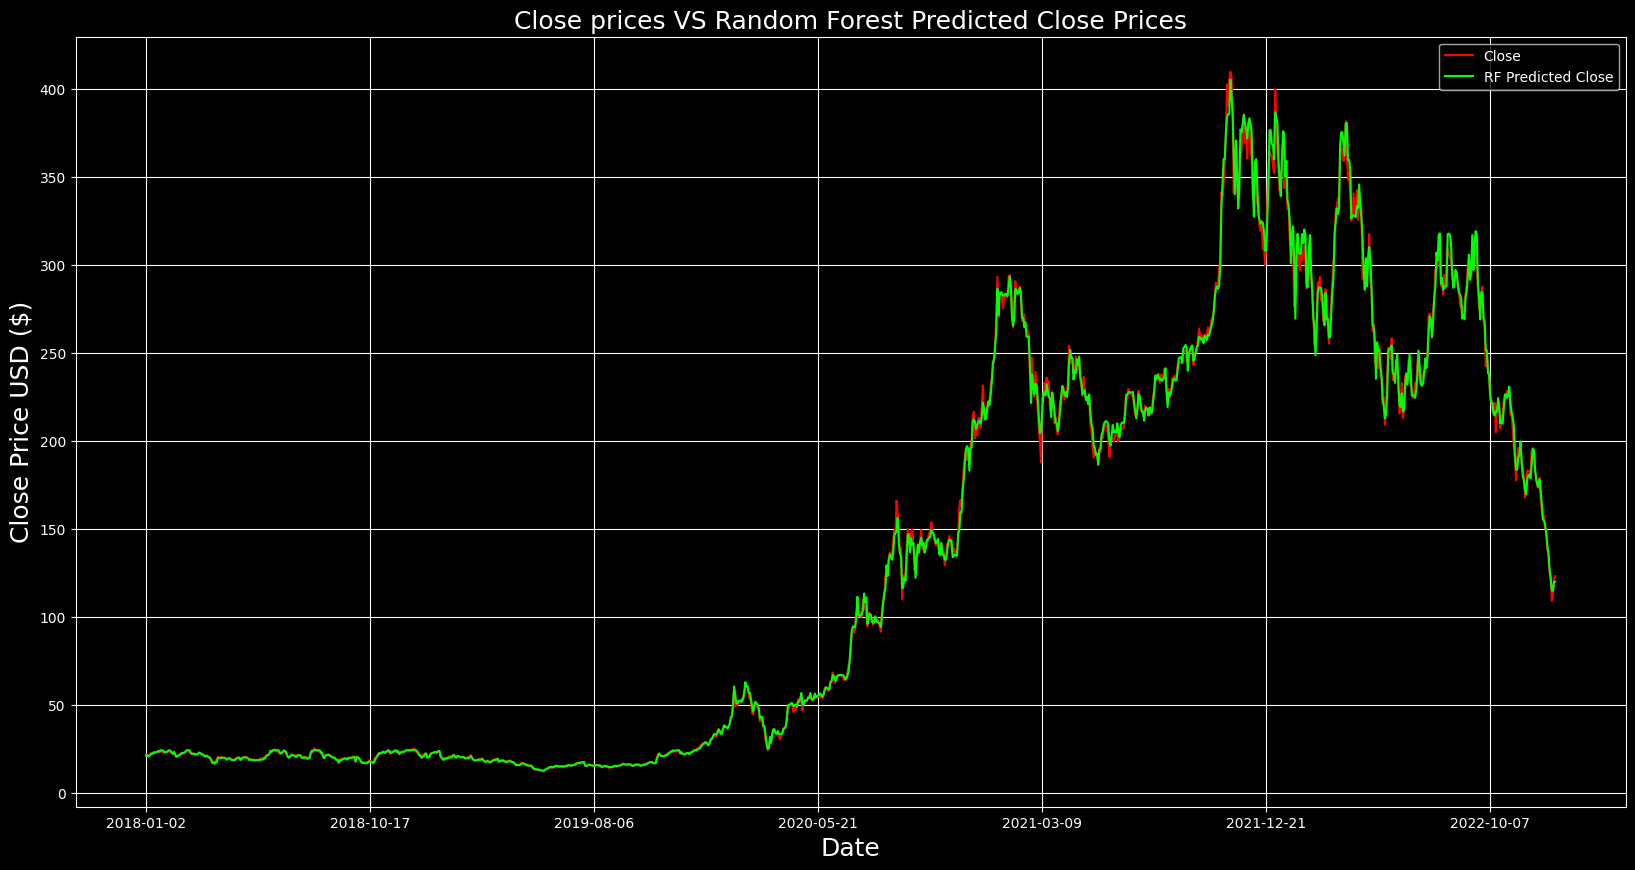

In [25]:
plt.title("Close prices VS Random Forest Predicted Close Prices", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#ff0000")
TSLA["RF Predicted Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.legend()
plt.show()


#### AdaBoost using Random Forest Estimator Evaluation

Using the best hyperparameters that were obtained by the Grid Search CV of the Random Forest Model, AdaBoost was applied using Random Forest as the Estimator (Model) and the best hyperparameters of it.

In [26]:
rf_adb_MSE = round(metrics.mean_squared_error(yTest, rf_adb_yPrediction), 3)
rf_adb_MAPE = round(100 * metrics.mean_absolute_percentage_error(yTest, rf_adb_yPrediction), 3)
print("AdaBoost Performance Evaluation")
print("-------------------------------")
print("MSE: ", rf_adb_MSE)
print("RMSE: ", round(np.sqrt(rf_adb_MSE),3))
print("MAPE: ", rf_adb_MAPE, "%")

AdaBoost Performance Evaluation
-------------------------------
MSE:  9.724
RMSE:  3.118
MAPE:  1.431 %


In [27]:
TSLA["ADB Predicted Close"] = rf_adb_fit.predict(TSLA[["Open", "High", "Low"]].values)
TSLA

,Open,High,Low,Close,Adj Close,Volume,RF Predicted Close,ADB Predicted Close
Date,,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,21.089678,21.023355
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,21.427612,21.356137
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,20.694717,20.769410
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,20.843481,20.915165
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,21.687565,21.680366
...,...,...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,121.621476,122.040689
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,114.923583,116.324933
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,114.843290,115.864787


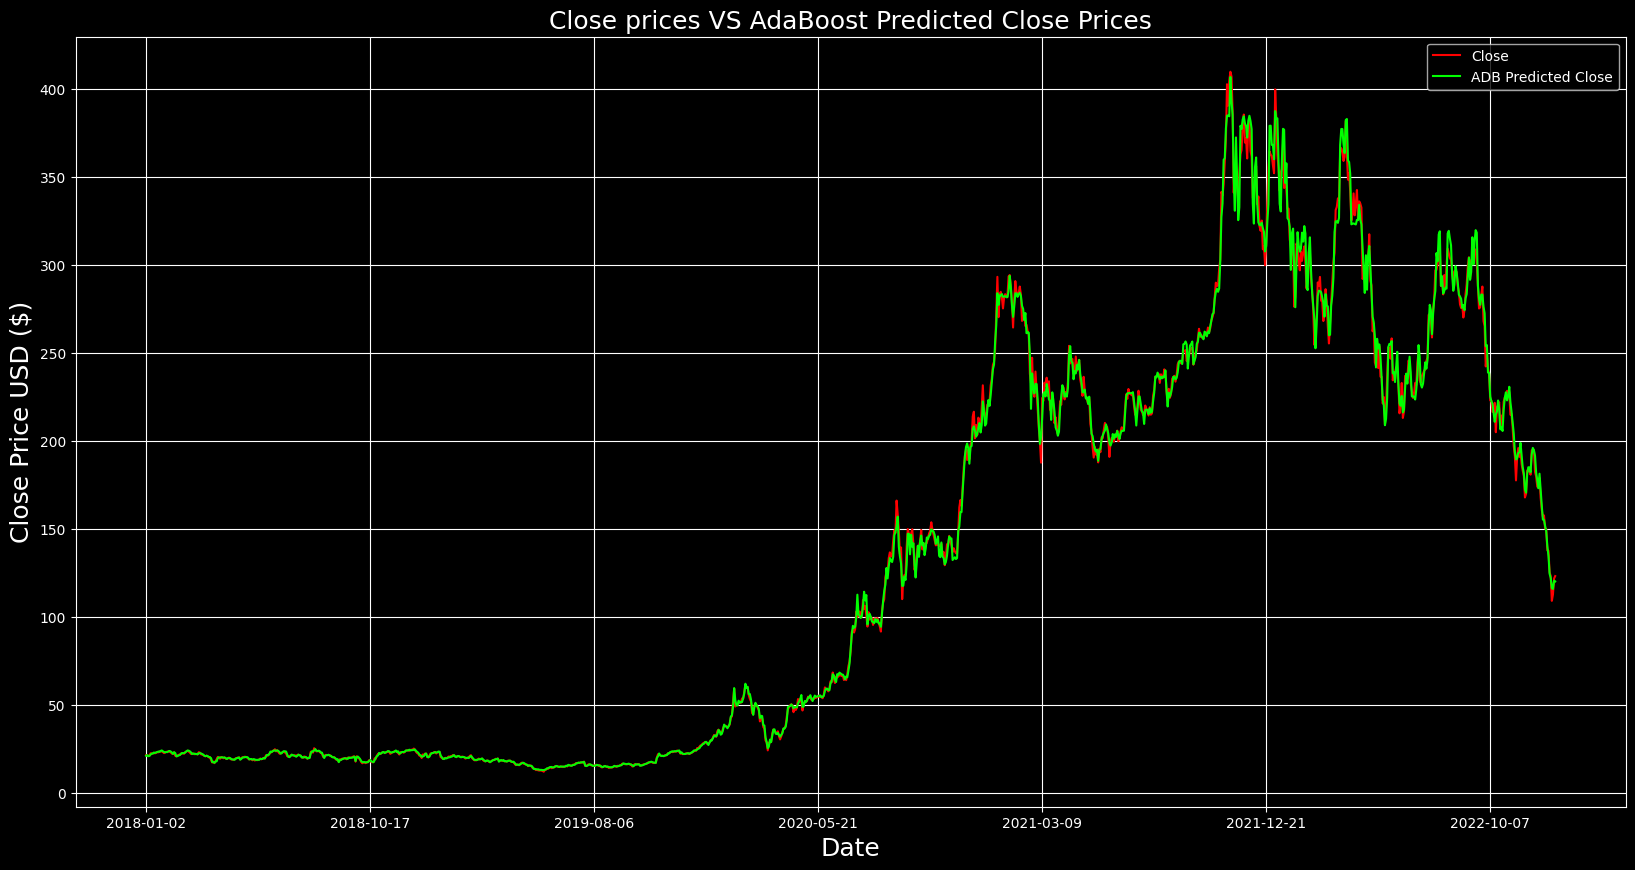

In [28]:
plt.title("Close prices VS AdaBoost Predicted Close Prices", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#ff0000")
TSLA["ADB Predicted Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.legend()
plt.show()


#### Support Vector Regressor using Grid Search CV Evaluation

Similar to what was earlier done with the Random Forrest grid search CV, a grid search CV is done to find the best hyperparameters for a Support Vector Regressor. We can notice that as the gamma decreases the scoring gets better and better.

In [29]:
svr_df = pd.DataFrame(svr_gscv_fit.cv_results_)
svr_df.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.280865,0.050887,0.020387,0.000630,1000.0,0.0001,rbf,"{'C': 1000.0, 'gamma': 0.0001, 'kernel': 'rbf'}",-6.109773,-5.667134,-8.066716,-9.266187,-9.114476,-7.644857,1.498955,1
5,2.222037,0.398202,0.021202,0.001931,10000.0,0.0001,rbf,"{'C': 10000.0, 'gamma': 0.0001, 'kernel': 'rbf'}",-6.667865,-5.663734,-8.827944,-8.925859,-9.364049,-7.889890,1.454334,2
7,15.412602,2.962126,0.017472,0.002963,100000.0,0.0001,rbf,"{'C': 100000.0, 'gamma': 0.0001, 'kernel': 'rbf'}",-7.706286,-7.184048,-9.539256,-9.130319,-9.649523,-8.641887,1.005963,3
1,0.165850,0.070705,0.024221,0.004376,100.0,0.0001,rbf,"{'C': 100.0, 'gamma': 0.0001, 'kernel': 'rbf'}",-7.087105,-13.419495,-7.560406,-13.602250,-7.937699,-9.921391,2.943736,4
2,0.701938,0.087090,0.026365,0.005563,1000.0,0.001,rbf,"{'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}",-7.909397,-13.968088,-9.388001,-22.039990,-17.227972,-14.106689,5.164713,5
0,0.250253,0.070807,0.034835,0.020510,100.0,0.001,rbf,"{'C': 100.0, 'gamma': 0.001, 'kernel': 'rbf'}",-23.819987,-36.863551,-10.978097,-22.760562,-9.750140,-20.834468,9.895100,6
4,6.754437,1.172041,0.020467,0.001987,10000.0,0.001,rbf,"{'C': 10000.0, 'gamma': 0.001, 'kernel': 'rbf'}",-11.437626,-22.974477,-16.157858,-49.823252,-20.505928,-24.179828,13.410827,7
6,63.601695,5.636114,0.014932,0.002696,100000.0,0.001,rbf,"{'C': 100000.0, 'gamma': 0.001, 'kernel': 'rbf'}",-27.160451,-33.571138,-35.728703,-139.993338,-48.669400,-57.024606,42.069154,8


In [30]:
svr_MSE = round(metrics.mean_squared_error(yTest, svr_yPrediction), 3)
svr_MAPE = round(100 * metrics.mean_absolute_percentage_error(yTest, svr_yPrediction), 3)
print("Support Vector Regressor Performance Evaluation")
print("-----------------------------------------------")
print("MSE: ", svr_MSE)
print("RMSE: ", round(np.sqrt(svr_MSE),3))
print("MAPE: ", svr_MAPE, "%")

Support Vector Regressor Performance Evaluation
-----------------------------------------------
MSE:  6.086
RMSE:  2.467
MAPE:  0.964 %


In [31]:
TSLA["SVR Predicted Close"] = svr_best_fit.predict(TSLA[["Open", "High", "Low"]].values)
TSLA

,Open,High,Low,Close,Adj Close,Volume,RF Predicted Close,ADB Predicted Close,SVR Predicted Close
Date,,,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,21.089678,21.023355,21.333249
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,21.427612,21.356137,21.382774
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,20.694717,20.769410,20.824768
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,20.843481,20.915165,20.921138
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,21.687565,21.680366,22.269297
...,...,...,...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,121.621476,122.040689,123.912657
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,114.923583,116.324933,112.412774
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,114.843290,115.864787,112.910268


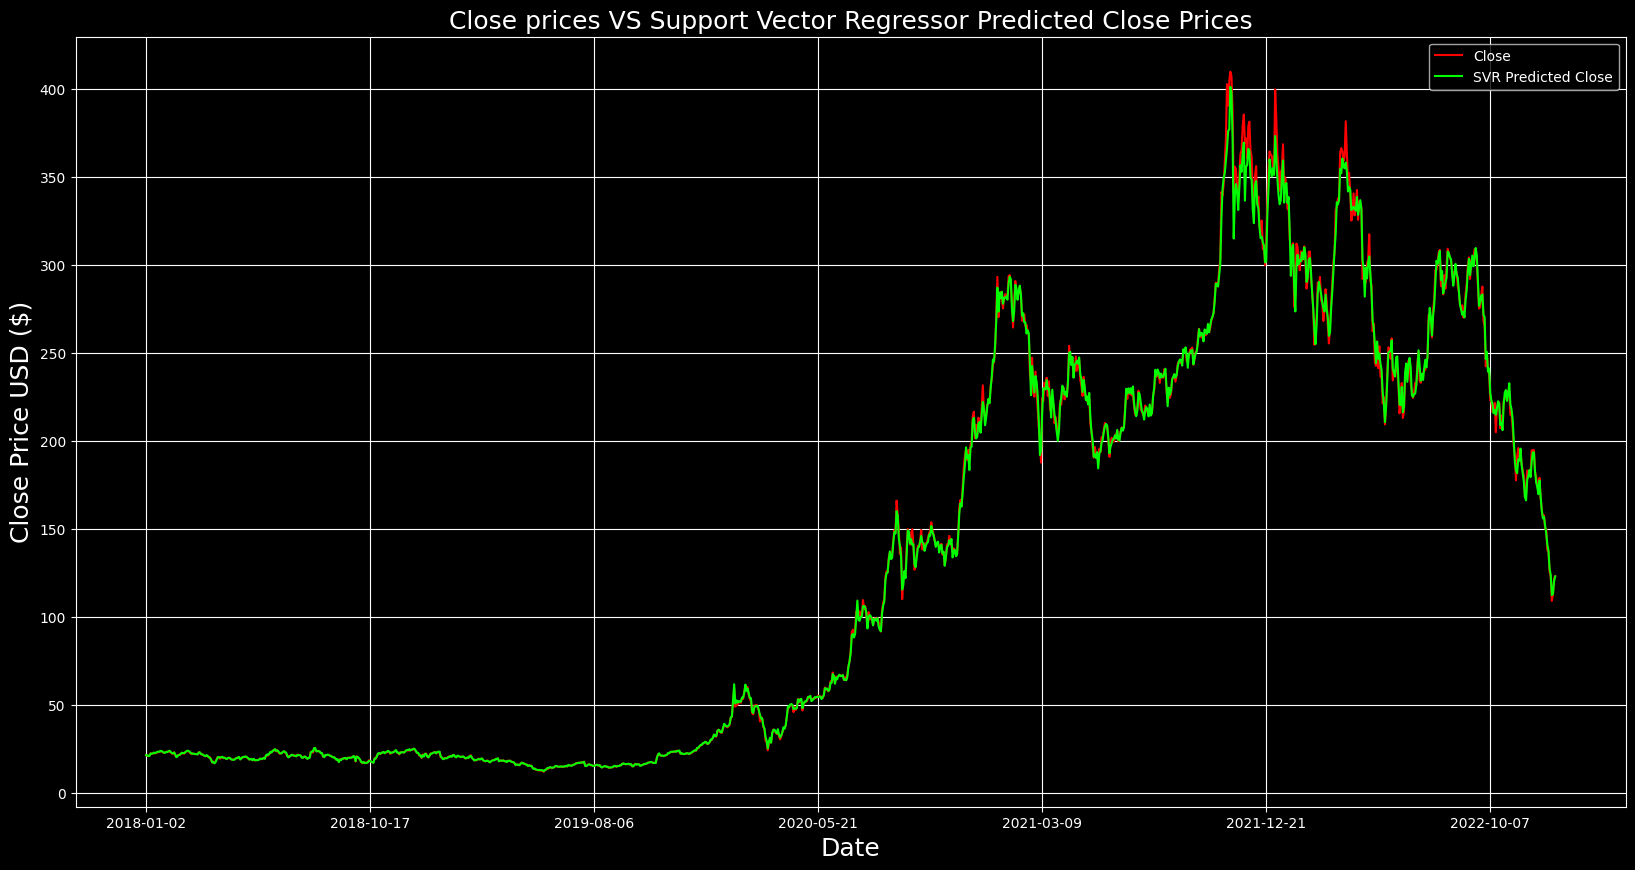

In [32]:
plt.title("Close prices VS Support Vector Regressor Predicted Close Prices", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#ff0000")
TSLA["SVR Predicted Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.legend()
plt.show()

#### Elastic Net Regression Evaluation

In [33]:
eln_df = pd.DataFrame(elng_gscv_fit.cv_results_)
eln_df.sort_values(by="rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
502,0.020721,0.001153,0.000602,0.000804,0.01,0.0,6000,"{'alpha': 0.01, 'l1_ratio': 0.0, 'max_iter': 6...",-6.246748,-5.807380,-7.323432,-7.084042,-7.750537,-6.842428,0.712820,1
507,0.021513,0.001877,0.000904,0.000197,0.01,0.01,6000,"{'alpha': 0.01, 'l1_ratio': 0.01, 'max_iter': ...",-6.246767,-5.807384,-7.323419,-7.084065,-7.750519,-6.842431,0.712811,2
512,0.021696,0.001269,0.002619,0.002281,0.01,0.02,6000,"{'alpha': 0.01, 'l1_ratio': 0.02, 'max_iter': ...",-6.246786,-5.807387,-7.323406,-7.084087,-7.750502,-6.842434,0.712802,3
517,0.022407,0.003632,0.001207,0.000248,0.01,0.03,6000,"{'alpha': 0.01, 'l1_ratio': 0.03, 'max_iter': ...",-6.246805,-5.807391,-7.323393,-7.084110,-7.750484,-6.842437,0.712794,4
522,0.024219,0.002855,0.001206,0.000250,0.01,0.04,6000,"{'alpha': 0.01, 'l1_ratio': 0.04, 'max_iter': ...",-6.246824,-5.807394,-7.323380,-7.084132,-7.750467,-6.842439,0.712785,5
527,0.029246,0.003763,0.000903,0.000493,0.01,0.05,6000,"{'alpha': 0.01, 'l1_ratio': 0.05, 'max_iter': ...",-6.246843,-5.807398,-7.323367,-7.084155,-7.750449,-6.842442,0.712776,6
532,0.021690,0.000934,0.001007,0.000006,0.01,0.06,6000,"{'alpha': 0.01, 'l1_ratio': 0.06, 'max_iter': ...",-6.246862,-5.807401,-7.323354,-7.084177,-7.750432,-6.842445,0.712767,7
537,0.019603,0.001575,0.000903,0.000493,0.01,0.07,6000,"{'alpha': 0.01, 'l1_ratio': 0.07, 'max_iter': ...",-6.246881,-5.807405,-7.323341,-7.084200,-7.750415,-6.842448,0.712758,8
542,0.022442,0.004865,0.001003,0.000005,0.01,0.08,6000,"{'alpha': 0.01, 'l1_ratio': 0.08, 'max_iter': ...",-6.246900,-5.807408,-7.323328,-7.084223,-7.750397,-6.842451,0.712749,9
547,0.021903,0.002309,0.001018,0.000523,0.01,0.09,6000,"{'alpha': 0.01, 'l1_ratio': 0.09, 'max_iter': ...",-6.246919,-5.807412,-7.323315,-7.084245,-7.750380,-6.842454,0.712740,10


In [34]:
eln_MSE = round(metrics.mean_squared_error(yTest, eln_yPrediction), 3)
eln_MAPE = round(100 * metrics.mean_absolute_percentage_error(yTest, eln_yPrediction), 3)
print("Elastic Net Performance Evaluation")
print("----------------------------------")
print("MSE: ", eln_MSE)
print("RMSE: ", round(np.sqrt(eln_MSE),3))
print("MAPE: ", eln_MAPE, "%")

Elastic Net Performance Evaluation
----------------------------------
MSE:  5.43
RMSE:  2.33
MAPE:  0.945 %


In [35]:
TSLA["ELN Predicted Close"] = eln_best_fit.predict(TSLA[["Open", "High", "Low"]].values)
TSLA

,Open,High,Low,Close,Adj Close,Volume,RF Predicted Close,ADB Predicted Close,SVR Predicted Close,ELN Predicted Close
Date,,,,,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000,21.089678,21.023355,21.333249,21.315047
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500,21.427612,21.356137,21.382774,21.340833
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500,20.694717,20.769410,20.824768,20.778120
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000,20.843481,20.915165,20.921138,20.897197
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000,21.687565,21.680366,22.269297,22.207828
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,121.621476,122.040689,123.912657,123.676453
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,114.923583,116.324933,112.412774,111.846461
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,114.843290,115.864787,112.910268,113.436819


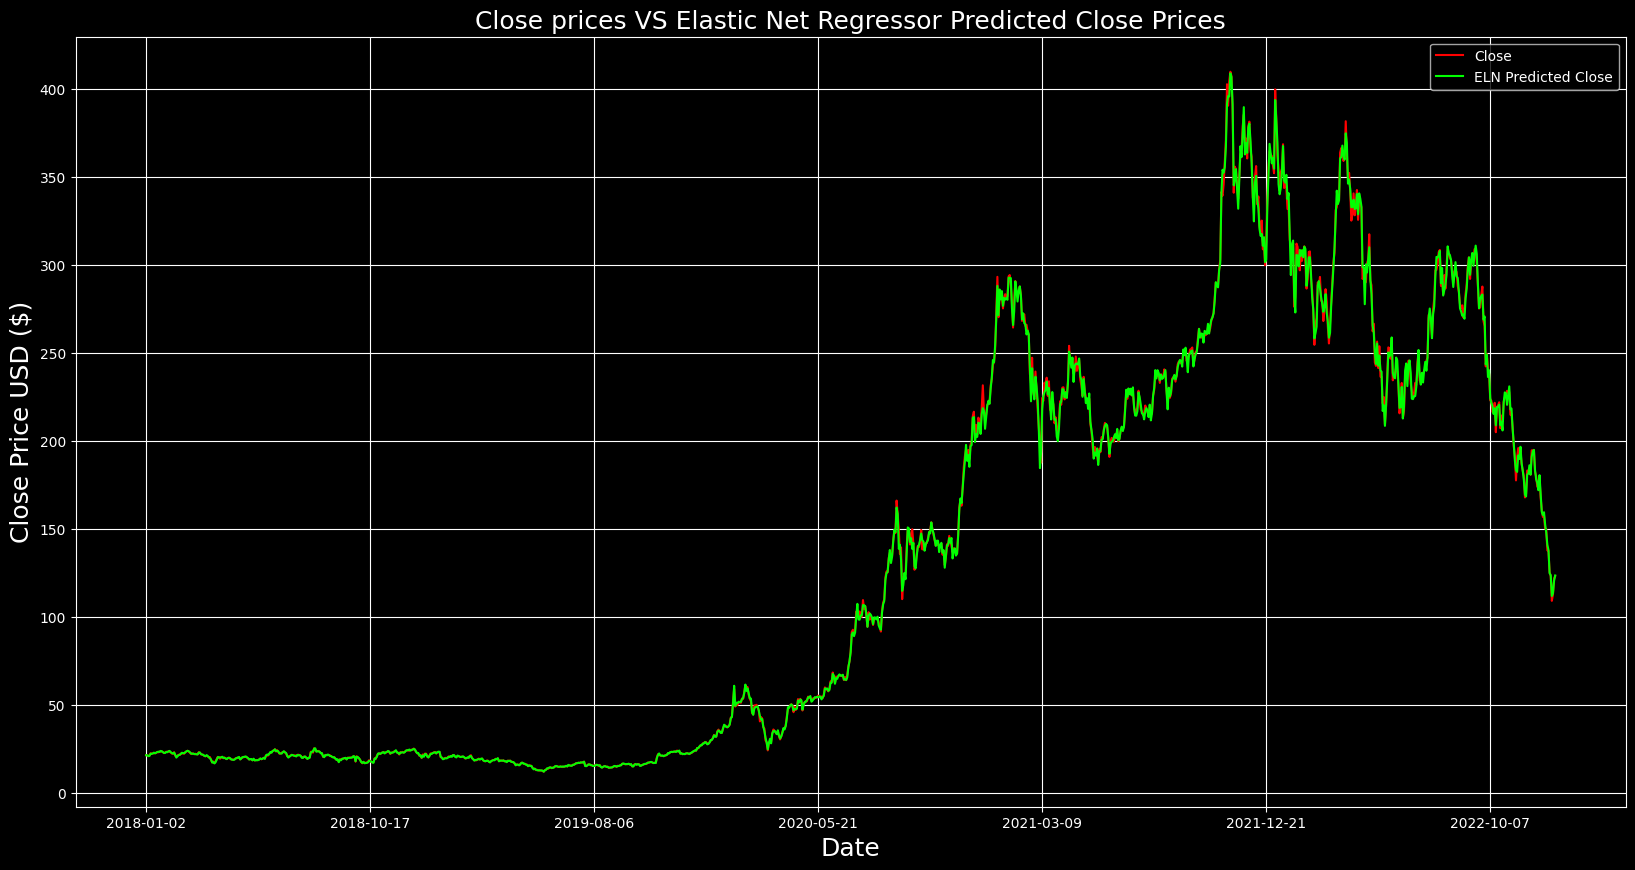

In [36]:
plt.title("Close prices VS Elastic Net Regressor Predicted Close Prices", fontsize=18)
TSLA["Close"].plot(figsize=(20, 10), color="#ff0000")
TSLA["ELN Predicted Close"].plot(figsize=(20, 10), color="#00ff00")
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.xlabel("Date", fontsize=18)
BC = plt.gca()
BC.set_facecolor("xkcd:black")
plt.grid()
plt.legend()
plt.show()

#### Model Rankings Comparison


In [37]:
ranks = {
    'Model' : ['Random Forrest','AdaBoost Random Forrest','Support Vector Regressor','Elastic Net'],
    'MAPE' : [rfr_MAPE, rf_adb_MAPE, svr_MAPE, eln_MAPE]
}

rank = pd.DataFrame(ranks)
rank = rank.sort_values(by='MAPE',ascending=True)
rank

,Model,MAPE
3,Elastic Net,0.945
2,Support Vector Regressor,0.964
0,Random Forrest,1.419
1,AdaBoost Random Forrest,1.419


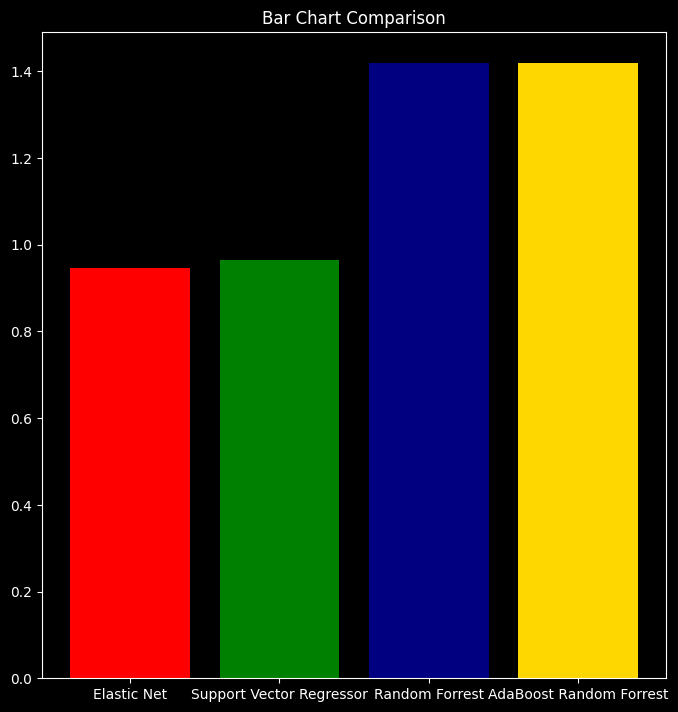

In [38]:
colors = ['red','green','navy','gold']
plt.figure(figsize=(7,7))
plt.bar(rank['Model'],rank['MAPE'],color=colors)
plt.tight_layout()
plt.title('Bar Chart Comparison')
plt.show()